<a href="https://colab.research.google.com/github/LuisMig-code/reduzir-CAC/blob/main/Aplicando_DS_ao_universo_do_Marketing_Digital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aplicando ***DataScience*** para reduzir CAC de restaurante:

Atualmente, um dos maiores desafios para a maioria das empresas , quqando se consolidam no mercado digital , é a redução do **CAC** . Mas afinal , o que é o *CAC*?

Simples, CAC significa "Custo de Aquisição de Clientes". Uma palavra autosugestiva. De forma exemplificada, o CAC refere-se a um valor monetário que indica quando uma empresa gasta para "adiquirir" um cliente , incluindo gastos de marketing e custos fixos:

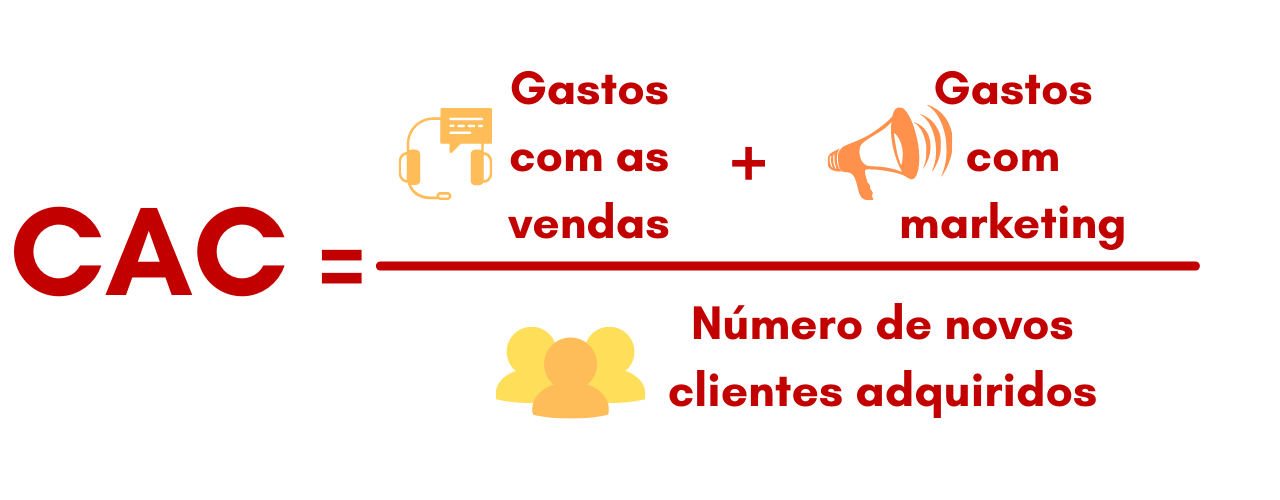

Tendo isso em mente, o maior desafio no marketing hoje é a redução desse CAC a fim de tornar cada vez maior o lucro da empresa e maximizar os lucros!

**Mas afinal, como fazer isso?**

Essa é uma pergunta que muitos profissionais da área do Marketing Digital e donos de negócios se fazem todos os dias! Pensando nisso , decidi trazer aqui hoje uma visão um pouco mais distantes dessas áreas e pensar de forma mais analítica, como um profissional da área da ciência de dados!

## Por onde começar?

<img src="https://image.freepik.com/free-vector/different-people-asking-questions_23-2148934441.jpg" width=500>

Quando se pensa no Marketing , a análise do negócio é a primeira etapa por parte do profissional.

Quando pensamos no cientista de dados , essa etapa não inclue somente isso , há a necessidade da inspeção dos dados que nos são oferecidos!

Observe novamente a fórmula acima, de que maneira podemos aumentar o CAC? simples , diminuindo os gastos e aumentando o número de clientes , certo? **SIM**!

Aumentar o número de clientes é uma consequência de boas estratégias de marketing , que por sua vez trás um menor gasto!

## Estudo do negócio

<Img src="https://image.freepik.com/free-photo/man-giving-business-presentation-using-futuristic-digital-pen_53876-108394.jpg" width=500>

Para o caso em questão hoje , vamos tratar de um **restaurante**!

De quais maneiras podemos aumentar o CAC? Novamente: Aumentar o número de pessoas que comem lá ao mesmo tempo que diminuímos os gastos!

O primeiro passo é pensar em como trazer clientes que já comeram no estabelecimento. Mas **por que**?



1.   Eles já conhecem o local
2.   Tende a ser mais baratos trazê-los de volta



Esse conceito se chama *Remarketing* . De forma geral , pegamos pessoas que já compraram de nós e fazemos eles comprar novamente!

**Mas de que forma podemos fazer isso?**

Por meio do chamado tráfego pago (anuncios online) , podemos mostrar determinados anuncios para públicos que já interagiram de alguma forma com nosso negócio!


Mas pensando em outra forma : Se o restaurante tiver dados dos clientes que já pediram algo no estabelcimento (seja delivery , seja presencial) podemos simplesmente chamá-los diretamente para o estabelecimento **sem gastar um único real** , que maravilhoso , não?

Sim e não . Na realidade se vocês tem 100 clientes é um número pequeno , alguns podem aceitar uma campanha via **WhatsApp** e comprar novamente , outos não. Agora imagine se você tivesse dados de 700 clientes? como seria?

**Esse é o momento em que o profissional de dados entra!**

Imagine que você tenha uma base de dados que te dá alguns dados do cliente e se ele foi ou não foi impactado por uma determinada campanha via mensagens de texto. Com esses dados podemos criar um modelo de predição que me diz se um cliente será de fato "*adquirido*" pela campanha em questão!

Com isso , o dono do restaurante pode maximizar o tempo dele enviando mensagens para pessoas que de fato tenham maiores chances de comprar novamente do estabelecimento ao invés de "atirar para todos os lados".

## Nossa base de dados

<img src="https://image.freepik.com/free-vector/big-data-processing-concept-server-room-blockchain-technology-token-access_39422-812.jpg" width=500>

Pensando nisso , nos foi cedida uma base de dados relativamente pequena (visto que o cliente não é tão grande) e que será usada para ajudar um cliente que quer uma forma de ser mais preciso ao enviar mensagens que tragam clientes que já compraram anteriormente nos seu restaurante!

In [1]:
# imports necessários ao projeto:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
# link das bases de dados:
path_treino = "https://raw.githubusercontent.com/LuisMig-code/reduzir-CAC/main/data/train.csv?raw=true"
path_teste = "https://raw.githubusercontent.com/LuisMig-code/reduzir-CAC/main/data/test.csv?raw=true"

In [24]:
df = pd.read_csv(path_treino,sep=";")
testes = pd.read_csv(path_teste,sep=";")

In [4]:
df.head()

,Nome,data ultima compra,gasto total,genero,vezes visitadas,trouxe amigos,delivery,presencial,impactado
0,Nil Sysoy,14/10/2021,50,M,1,N,Y,N,0
1,Beyts Valaam,14/10/2021,"52,2",M,1,N,N,Y,1
2,Houkins Fedosiy,10/10/2021,32,M,1,N,Y,Y,0
3,Lemb Anfim,12/10/2021,32,M,1,N,Y,N,0
4,Taunsend Valaam,12/10/2021,32,M,1,N,Y,N,0


Na base de dados fornecida temos as seguintes colunas (variáveis):
<br><br>

*   **Nome** = Nome do cliente em questão (fictício)
*   **data ultima compra** = A data da última vez em que o cliente em questão comprou no estabelecimento
*   **gasto total** = Quanto esse pessoa já gastou no restaurante (em R$)
*   **genero** = genero do cliente (M para Masculino e F para Feminino)
*   **vezes visitadas** = Quantas vezes essa pessoa já visitou o estabelecimento
*   **trouxe amigos** = O cliente em questão já trouxe alguma pessoa consigo para o restaurante? (N para Não e Y para Sim)
*   **delivery** = O cliente em questão já pediu alguma vez por delivery? (N para Não e Y para Sim)
*   **presencial** = O cliente em questão já esteve presencialmente no restaurante? (N para Não e Y para Sim)
*   **impactado** = Essa pessoa foi de fato impactada pela campanha (respondeu a mensagem no WhatsApp ou veio ao restaurante por ela novamente). Basicamente nossa variável alvo!



Tendo em vista a nossa base de dados e o que temos disponíveis para trabalhar, vamos colocar a mão na massa!

### Consertando os dados

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Nome                84 non-null     object
 1   data ultima compra  84 non-null     object
 2   gasto total         84 non-null     object
 3   genero              84 non-null     object
 4   vezes visitadas     84 non-null     int64 
 5   trouxe amigos       84 non-null     object
 6   delivery            84 non-null     object
 7   presencial          84 non-null     object
 8   impactado           84 non-null     int64 
dtypes: int64(2), object(7)
memory usage: 6.0+ KB


A primeira coisa que vou fazer é "consertar" os dados. Podemos ver que de forma geral , muitos dados são do tipo "object" , isso é textos.


Vou começar consertando a data e tornando ela de uma forma que a máquina consiga interpretar e ler!

In [6]:
data_USA = []
for data in df["data ultima compra"]:
  data = data.split("/")

  ano = data[2]
  dia = data[0]
  mes = data[1]

  nova_data = "-".join( [ano,mes,dia] )
  data_USA.append(nova_data)

df["data ultima compra"] = data_USA

df["data ultima compra"] = pd.to_datetime(df["data ultima compra"])

Feito isso , chegou a hora de aplicarmos um pouco do nosso conhecimento de Cientista de Dados e aplicar um pouco de engenharia de dados! Como? Simples: De forma geral a data da última compra não nos interessa , e sim **a quantidade de dias desde a última compra!**. Para isso vamos fazer alguns cálculos básicos:

In [7]:
hoje = pd.to_datetime(pd.Timestamp.today().strftime('%Y-%m-%d'))

Tendo conosco a data do dia de hoje , basta substrair dela a data da última compra!

In [8]:
df["dias_ultima_compra"] = hoje - df["data ultima compra"]

In [9]:
df.head()

,Nome,data ultima compra,gasto total,genero,vezes visitadas,trouxe amigos,delivery,presencial,impactado,dias_ultima_compra
0,Nil Sysoy,2021-10-14,50,M,1,N,Y,N,0,7 days
1,Beyts Valaam,2021-10-14,"52,2",M,1,N,N,Y,1,7 days
2,Houkins Fedosiy,2021-10-10,32,M,1,N,Y,Y,0,11 days
3,Lemb Anfim,2021-10-12,32,M,1,N,Y,N,0,9 days
4,Taunsend Valaam,2021-10-12,32,M,1,N,Y,N,0,9 days


Entretando , note que não temos de fato o número de dias desde a última comprar , temos na verdade um texto que nos informa isso ("X Days") e o que queremos é apenas o valor numérico!

In [10]:
dias_compras = []
for dias in df.dias_ultima_compra.astype(str):
  num_dia = int(dias.split()[0])
  dias_compras.append(num_dia)

df["dias_ultima_compra"] = dias_compras

Feito isso, vamos remover a coluna da data da última compra , visto que ela não nos interessa mais.

In [11]:
df.drop(["data ultima compra"],axis=1,inplace=True)

Com isso feito , temos ainda outro ponto a consertar, o valor gasto!

Note que ele tem uma vírgula (",") , para o interpretador python , uma vírgula não significa nada , apenas mais um texo , temos de substituí-la por um ponto (".") a fim de tornar um número de fato

In [12]:
gastos = []
for valor in df["gasto total"]:
  gasto = valor.replace(",",".")
  gasto = float(gasto)
  gastos.append(gasto)

df["gasto total"] = gastos

Feito isso , vamos para a última etapa, transformar nossos dados categóricos em dados mais legíveis. Basicamente vamos torná-los colunas!

In [13]:
df = pd.get_dummies(df , columns = ["genero","trouxe amigos","delivery","presencial"],)

In [14]:
df.head()

,Nome,gasto total,vezes visitadas,impactado,dias_ultima_compra,genero_F,genero_M,trouxe amigos_N,trouxe amigos_Y,delivery_N,delivery_Y,presencial_N,presencial_Y
0,Nil Sysoy,50.0,1,0,7,0,1,1,0,0,1,1,0
1,Beyts Valaam,52.2,1,1,7,0,1,1,0,1,0,0,1
2,Houkins Fedosiy,32.0,1,0,11,0,1,1,0,0,1,0,1
3,Lemb Anfim,32.0,1,0,9,0,1,1,0,0,1,1,0
4,Taunsend Valaam,32.0,1,0,9,0,1,1,0,0,1,1,0


Com isso feito , já podemos partir para a próxima etapa do projeto e iniciar de fato um modelo capaz de prever as pessoas mais propensas a serem impactadas pela nossa campanha de mensagens!

## Machine Learning

A primeira coisa que eu gostaria de analisar antes de começar de fato a criar um modelo de *Machine Learning* é visualizar como nossa variável "impactado" está distribuida: 

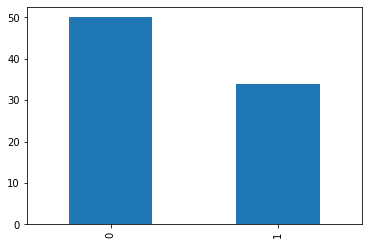

In [17]:
ax = df.impactado.value_counts().plot(kind="bar")
ax=ax

O que já p odemos observar é que temos mais dados que se classificam como 0 , o seja , pessoas que não foram impactadas por campanhas de marketing do que o contrário. 


Isso na verdade era bem esperado , visto que é mais comum esse comportamento do que o de ser impactado pela campanha. 


Normalmente faríamos uma espécie de balaceamento em nossas classe (ensino [nesse outro artigo](https://luis-miguel-code.medium.com/como-lidar-com-classes-desbalanceadas-em-machine-learning-precision-recall-oversampling-e-ce21e3ccb615)) mas como já temos poucos dados na base de dados, o melhor é partirmos para a criação do modelo em sí.


Mas só gostaria de deixar ressaltado esse fato que pode eventualmente diminuir a precisão de acerta para os casos classificados como 1.

O primeiro passo é dividir os nossos dados em X e y , isso é  , as variáveis que são usadas para predição e a variável alvo , o resultado da predição em sí.

In [19]:
# dividindo os dados:
X = df.drop(["Nome","impactado"],axis=1)
y = df.impactado

In [21]:
# instanciando o modelo:
modelo = XGBClassifier(random_state=28,
                       learning_rate=0.01,
                       n_estimators=750,
                       max_depth=3,
                       colsample_bynode=0.95
                       )

Com um modelo criado e dados separados , podemos treinar o modelo com esses dados!

In [22]:
modelo.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=0.95, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=750, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=28,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

O algoritimo que eu decidi usa é o XGBoost , que eu considero na atualidade o melhor algoritimo para dados tabulares.

Com um modelo treinado , basta agora medirmos o quão bem ele se saiu . Para isso iremos usar uma base de dados separada exclusiva para o teste!

### Medições do modelo

<img src="https://image.freepik.com/free-photo/workplace-results-professional-report-accounting-during_1418-61.jpg" width=500>

A primeira etapa é "consertar" também a base de dados de teste.

Caso não se lembre , ainda não padronizamos todos os dados, apenas os de treino.

In [25]:
### transformando as datas:
data_USA = []
for data in testes["data ultima compra"]:
  data = data.split("/")

  ano = data[2]
  dia = data[0]
  mes = data[1]

  nova_data = "-".join( [ano,mes,dia] )
  data_USA.append(nova_data)

testes["data ultima compra"] = data_USA


testes["data ultima compra"] = pd.to_datetime(testes["data ultima compra"])

hoje = pd.to_datetime(pd.Timestamp.today().strftime('%Y-%m-%d'))

testes["dias_ultima_compra"] = hoje - testes["data ultima compra"]

dias_compras = []
for dias in testes.dias_ultima_compra.astype(str):
  num_dia = int(dias.split()[0])
  dias_compras.append(num_dia)

testes["dias_ultima_compra"] = dias_compras

testes.drop(["data ultima compra"],axis=1,inplace=True)

### Gastos:
gastos = []
for valor in testes["gasto total"]:
  gasto = valor.replace(",",".")
  gasto = float(gasto)
  gastos.append(gasto)

testes["gasto total"] = gastos

### Get dummies
testes = pd.get_dummies(testes , columns = ["genero","trouxe amigos","delivery","presencial"],)
testes.head()

,Nome,gasto total,vezes visitadas,impactado,dias_ultima_compra,genero_F,genero_M,trouxe amigos_N,trouxe amigos_Y,delivery_N,delivery_Y,presencial_N,presencial_Y
0,Luís,102.36,1,0,11,0,1,0,1,1,0,0,1
1,Rafael,97.50,2,1,76,0,1,0,1,1,0,0,1
2,Amanda,29.00,1,0,61,1,0,1,0,1,0,0,1
3,Claudio,32.58,1,0,39,0,1,1,0,1,0,0,1
4,Ana,158.97,2,1,12,1,0,0,1,0,1,0,1


Com os dados padronizados , podemos dividí-los em X e y como fizemos anteriormente também!

In [26]:
X_teste = testes.drop(["Nome","impactado"],axis=1)
y_teste = testes.impactado

Feito isso , podemos iniciar as predições com os dados de teste e então visualizar os resultados.

In [28]:
predicoes = modelo.predict(X_teste)

In [29]:
acuracia = accuracy_score(y_teste,predicoes)

print(f"{round(acuracia*100)}% de acurácia")
print(classification_report(y_teste,predicoes))

92% de acurácia
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.80      0.89         5

    accuracy                           0.92        12
   macro avg       0.94      0.90      0.91        12
weighted avg       0.93      0.92      0.91        12



### Conclusões

Com esses dados já podemos notar que obtivemos uma acurácia (taxa de acerto) relativamente alta , acertando cerca de 92% dos usuários que são ou não são impactados , sendo que tem **100%** de certeza daqueles que serão de fato impactados (*precision*).

No geral , tivemos bons resultados , entretanto vale ressaltar que tanto a base de dados de treino quanto a base de teste são pequenas , então não temos de fato um modelo consolidado, podendo facilmente mudar estes resultados conforme a base de dados aumenta!